<a href="https://colab.research.google.com/github/rahimova-zulya/myprojects/blob/main/Rakhimova_music_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import librosa
import numpy as np

In [ ]:
from google.colab import drive  # подключаемся к гуглдиску
drive.mount('/content/MyDrive/')

Mounted at /content/MyDrive/


In [ ]:
# создаем переменную с путем к папкам с аудиозаписями
data_path = "/content/MyDrive/MyDrive/genres/"

In [ ]:
# создаем переменную со списком жанров
genres = os.listdir(data_path)

In [ ]:
# создаем пустые списки для хранения данных и меток
all_mfccs = []
labels = []

In [ ]:
# извлекаем MFCC у первой песни из папки Blues
audio_test_0 = '/content/MyDrive/MyDrive/genres/blues/blues.00000.au'
y, sr = librosa.load(audio_test_0, duration=30)  # загружаем аудио, ограничиваем длительность до 30 секунд
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # извлекаем MFCC из аудио
mfccs = np.mean(mfccs.T, axis=0)  # усредняем MFCC по времени

In [ ]:
print(mfccs)

[-113.619385   121.55302    -19.151056    42.345768    -6.3711677
   18.613033   -13.69206     15.339378   -12.283618    10.973775
   -8.32241      8.8067875   -3.665802 ]


In [ ]:
import librosa.display
import matplotlib.pyplot as plt

<ipython-input-9-0f12f2f4a04e>:4: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)  # вычисляем


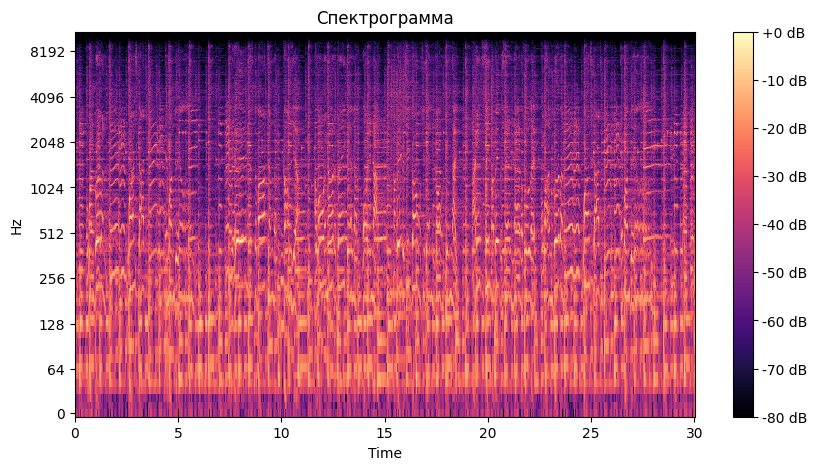

In [ ]:
# вычисляем спектрограммы и отображение у первой песни из папки Blues
audio_test_1 = '/content/MyDrive/MyDrive/genres/blues/blues.00000.au'
y, sr = librosa.load(audio_test_1)
D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)  # вычисляем
plt.figure(figsize=(10, 5))
librosa.display.specshow(D, y_axis='log', x_axis='time')  # отображаем
plt.colorbar(format='%+2.0f dB')
plt.title('Спектрограмма')  # называем
plt.show()

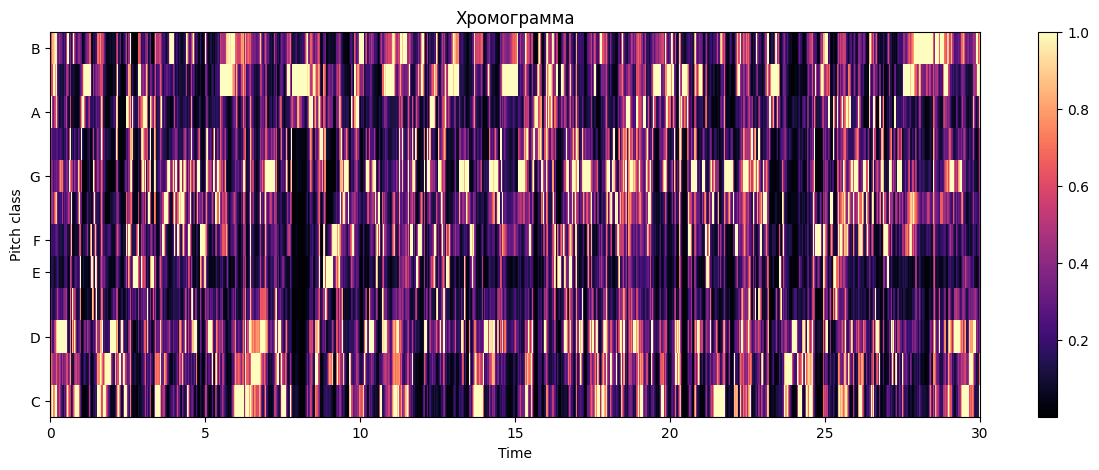

In [ ]:
# вычисляем хромограмму и отображение у этой же песни
audio_test_2 = '/content/MyDrive/MyDrive/genres/blues/blues.00000.au'
y, sr = librosa.load(audio_test_2)
chroma = librosa.feature.chroma_stft(y=y, sr=sr)  # вычисляем
plt.figure(figsize=(15, 5))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')  # отображаем
plt.colorbar()
plt.title('Хромограмма')  # называем
plt.show()

In [ ]:
# собираем в цикл
for i, genre in enumerate(genres):
    genre_path = os.path.join(data_path, genre)
    for filename in os.listdir(genre_path):
        audio_path = os.path.join(genre_path, filename)
        y, sr = librosa.load(audio_path, duration=30)   # загружаем аудио, ограничиваем длительность  , duration=30 до 30 секунд
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc = 40, hop_length = 8192)   # извлекаем MFCC из аудио
        mfccs = np.mean(mfccs.T, axis=0)   # усредняем MFCC по времени
        all_mfccs.append(mfccs)
        labels.append(i)   # мспользуем номер жанра в качестве метки

In [ ]:
# преобразуем списки в numpy массивы
x = np.array(all_mfccs)
y = np.array(labels)

In [ ]:
print(x.shape)
print(y.shape)

(1000, 40)
(1000,)


SVC

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Разделение на обучающий и тестовый наборы
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=16)

# Создание и обучение модели
model = SVC()
model.fit(x_train, y_train)

# Оценка модели
accuracy = model.score(x_test, y_test)
print(f'Точность модели: {accuracy}')

Точность модели: 0.55


Случайный лес

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.predict(x_test)
y_pred = rfc.score(x_test, y_test)
print(f'Точность модели: {y_pred}')

Точность модели: 0.73


Дерево решений

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [ ]:
# Рассчет точности
accuracy = np.mean(y_pred == y_test)
print(f'Точность модели: {accuracy}')

Точность модели: 0.4166666666666667


Показатрели низкие. Начинаем заново. Загружаем и исследуем 1 аудио

In [ ]:
file = '/content/MyDrive/MyDrive/genres/classical/classical.00054.au'
signal, sr = librosa.load(file, sr = 22050) # загружаем файл классической  музыки
print(signal.shape, sr)
print(signal)

(672282,) 22050
[-0.16220093 -0.24996948 -0.22930908 ...  0.          0.
  0.        ]


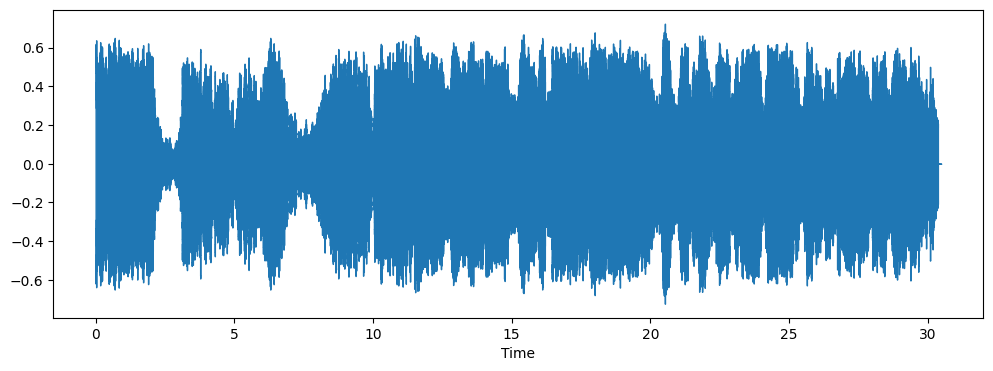

In [ ]:
# представляем в виде звуковой волны
import matplotlib.pyplot as plt
import librosa.display as ld
plt.figure(figsize=(12,4))
ld.waveshow(signal, sr=sr)

In [ ]:
# прослушаем
import IPython
display(IPython.display.Audio(signal, rate = sr))

Text(0, 0.5, 'Amplitude')

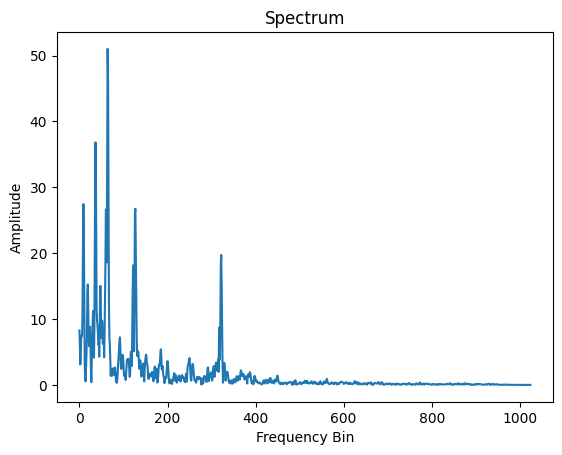

In [ ]:
# переводим из временной области в частотную область с помощью преобразования Фурье
n_fft = 2048
ft = np.abs(librosa.stft(signal[:n_fft], hop_length = n_fft+1))
plt.plot(ft)
plt.title('Spectrum')
plt.xlabel('Frequency Bin')
plt.ylabel('Amplitude')

Спектрограмма

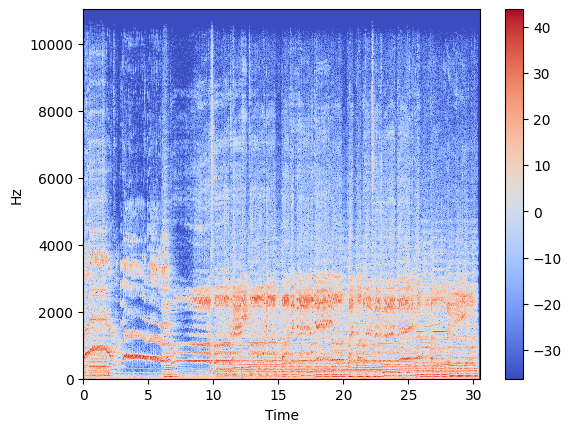

In [ ]:
# спектрограмма аудиосигнала
X = librosa.stft(signal)
s = librosa.amplitude_to_db(abs(X))
ld.specshow(s, sr=sr, x_axis = 'time', y_axis='linear')
plt.colorbar()

Мел-кепcтральные коэффициенты (MFCC)

In [ ]:
# находим мел-кепcтральные коэффициенты
mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc = 40, hop_length=512)
mfccs

array([[ -65.5927   ,  -49.084835 ,  -58.394768 , ..., -555.2032   ,
        -555.2032   , -555.2032   ],
       [ 133.95331  ,  128.10812  ,  126.879745 , ...,    0.       ,
           0.       ,    0.       ],
       [ -29.08751  ,  -33.69106  ,  -32.966797 , ...,    0.       ,
           0.       ,    0.       ],
       ...,
       [   6.513466 ,    8.532154 ,    9.261887 , ...,    0.       ,
           0.       ,    0.       ],
       [  -9.937672 ,  -11.3983345,  -13.607697 , ...,    0.       ,
           0.       ,    0.       ],
       [   5.6057553,    3.2451553,   -6.864602 , ...,    0.       ,
           0.       ,    0.       ]], dtype=float32)

In [ ]:
mfccs.shape

(40, 1314)

In [ ]:
melspectrum = librosa.feature.melspectrogram(y=signal, sr = sr,
                                        	hop_length =512, n_mels = 40)

Спектральный центроид (Spectral Centroid) - показатель яркости звука

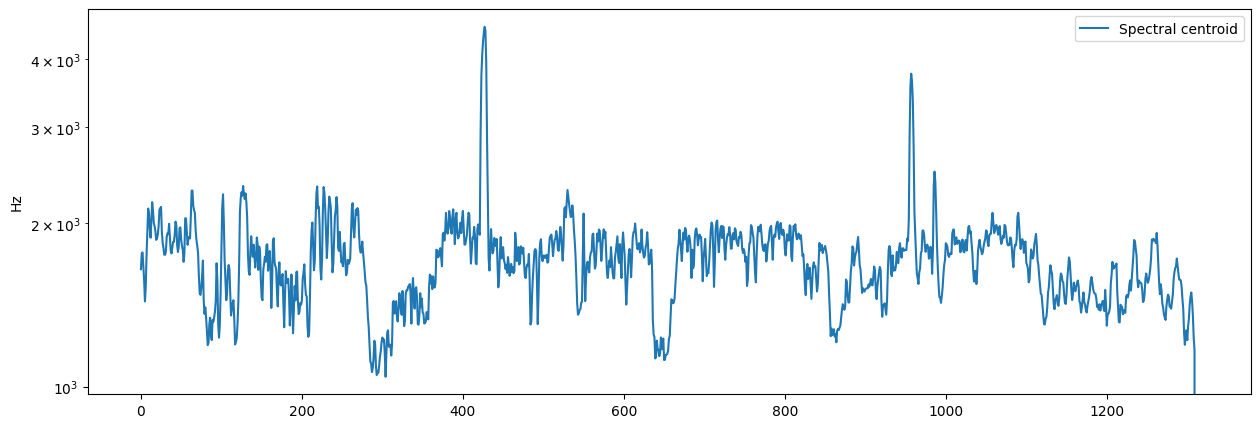

In [ ]:
cent = librosa.feature.spectral_centroid(y=signal, sr=sr)
plt.figure(figsize=(15,5))
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.legend()

In [ ]:
# для сравнения возьмем еще металл-композицию
file_metal = '/content/MyDrive/MyDrive/genres/metal/metal.00039.au'
signal_2, sr = librosa.load(file_metal, sr = 22050) # загружаем файл
print(signal_2.shape, sr)
print(signal_2)

(661504,) 22050
[-0.04263306 -0.01522827 -0.02587891 ... -0.10150146 -0.10940552
 -0.11834717]


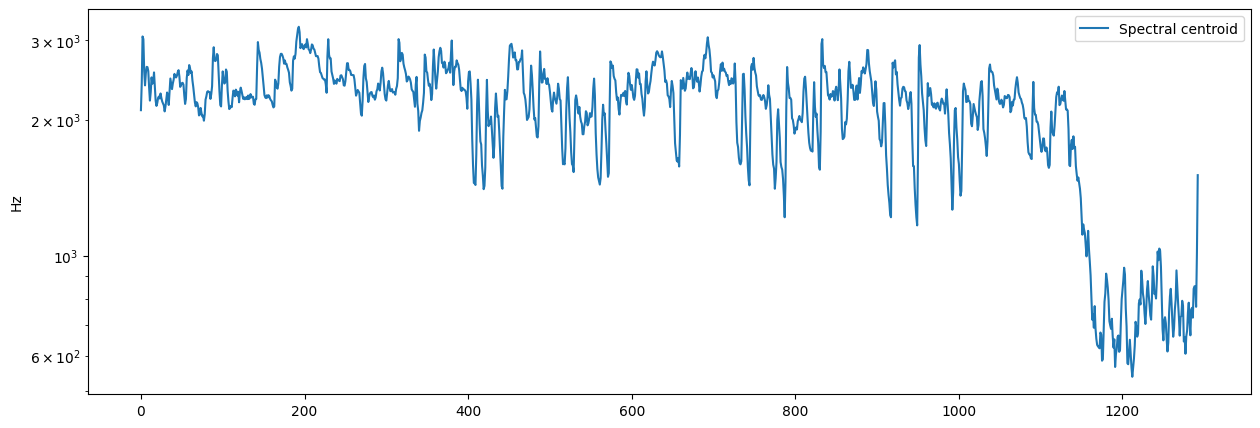

In [ ]:
cent = librosa.feature.spectral_centroid(y=signal_2, sr=sr)
plt.figure(figsize=(15,5))
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.legend()

Спектральный спад  (Spectral Rolloff)



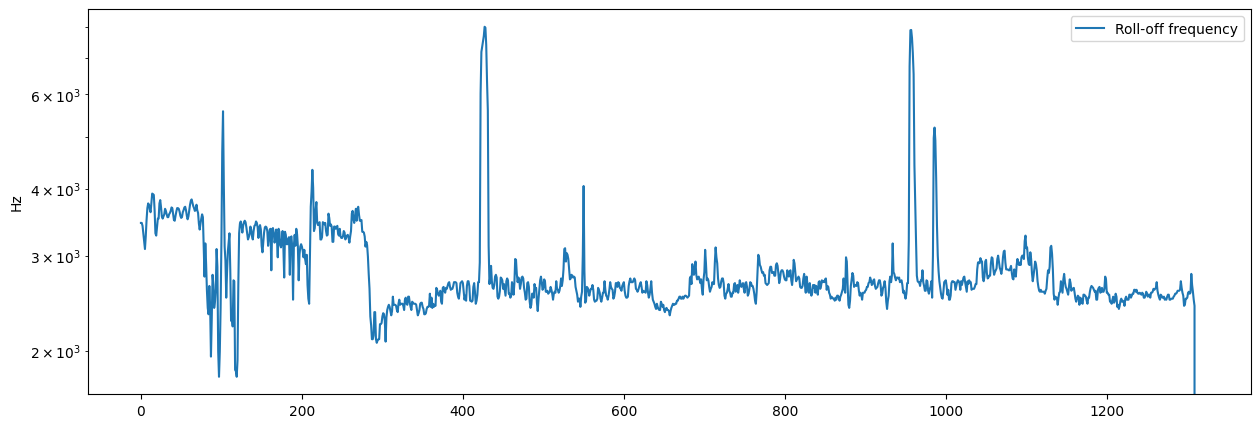

In [ ]:
# частота, ниже которой лежит определенный процент от общей спектральной энергии
# для классической композиции
rolloff = librosa.feature.spectral_rolloff(y=signal, sr=sr)
plt.figure(figsize=(15,5))
plt.semilogy(rolloff.T, label='Roll-off frequency')
plt.ylabel('Hz')
plt.legend()

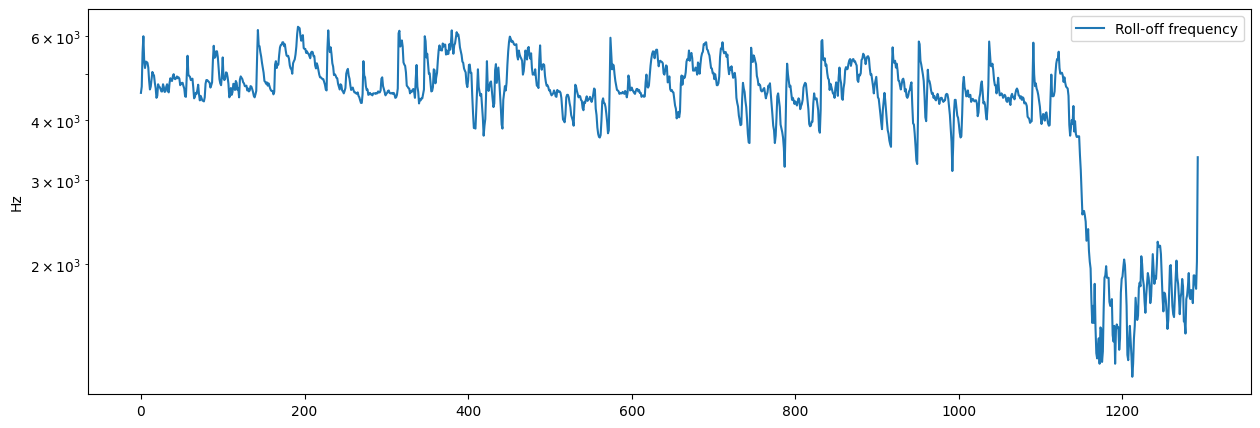

In [ ]:
# для металл-композиции
rolloff = librosa.feature.spectral_rolloff(y=signal_2, sr=sr)
plt.figure(figsize=(15,5))
plt.semilogy(rolloff.T, label='Roll-off frequency')
plt.ylabel('Hz')
plt.legend()

Скорость пересечения нуля (Zero crossing Rate)

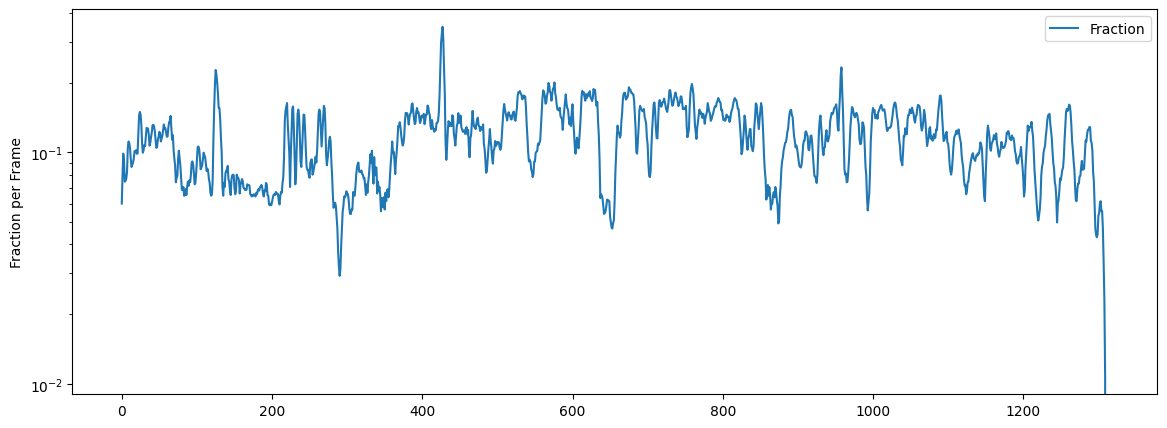

In [ ]:
# частота, с которой сигнал меняется с положительного на отрицательный и обратно
# для классической композиции
zrate=librosa.feature.zero_crossing_rate(signal)
plt.figure(figsize=(14,5))
plt.semilogy(zrate.T, label='Fraction')
plt.ylabel('Fraction per Frame')
plt.legend()

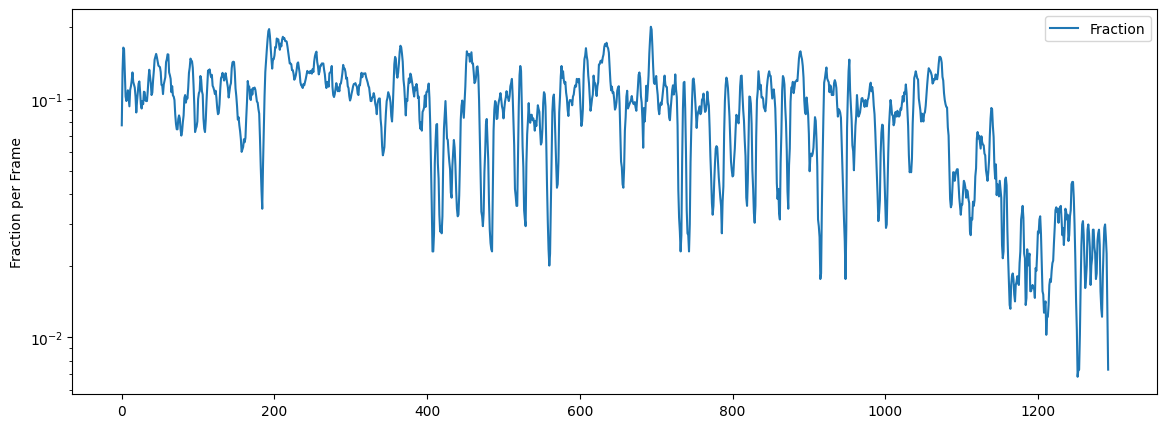

In [ ]:
# для металл-композиции
zrate=librosa.feature.zero_crossing_rate(signal_2)
plt.figure(figsize=(14,5))
plt.semilogy(zrate.T, label='Fraction')
plt.ylabel('Fraction per Frame')
plt.legend()

Создаем датасет

In [ ]:
import os
import pandas as pd

# Подключение к Google диску
from google.colab import drive
drive.mount('/content/drive')

# Создание датафрейма
df = pd.DataFrame(columns=['genre', 'audio'])

# Переменная для отслеживания индекса строки в датафрейме
index = 0

# Цикл по папкам в "genres"
folder_path = "/content/drive/My Drive/genres"
for folder in os.listdir(folder_path):
    audio_files = os.listdir(os.path.join(folder_path, folder))
    for audio_file in audio_files:
        # Извлечение жанра из названия папки
        genre = folder
        # Добавление строки в датафрейм
        df.loc[index] = [genre, os.path.join(folder_path, folder, audio_file)]
        index += 1
        # Прерывание цикла после добавления 1000 аудиофайлов
        if index == 1000:
            break
    if index == 1000:
        break

print(df)

Mounted at /content/drive
       genre                                              audio
0    country  /content/drive/My Drive/genres/country/country...
1    country  /content/drive/My Drive/genres/country/country...
2    country  /content/drive/My Drive/genres/country/country...
3    country  /content/drive/My Drive/genres/country/country...
4    country  /content/drive/My Drive/genres/country/country...
..       ...                                                ...
995     jazz  /content/drive/My Drive/genres/jazz/jazz.00094.au
996     jazz  /content/drive/My Drive/genres/jazz/jazz.00095.au
997     jazz  /content/drive/My Drive/genres/jazz/jazz.00098.au
998     jazz  /content/drive/My Drive/genres/jazz/jazz.00096.au
999     jazz  /content/drive/My Drive/genres/jazz/jazz.00097.au

[1000 rows x 2 columns]


Добавляем в датасет характеристики к каждой аудиозаписи

In [ ]:
import numpy as np
import librosa

In [ ]:
# Создание новых колонок в датасете
df['mfcc_mean'] = 0.0
df['mfcc_std'] = 0.0
df['cent_mean'] = 0.0
df['cent_std'] = 0.0
df['rolloff_mean'] = 0.0
df['rolloff_std'] = 0.0
df['zrate_mean'] = 0.0
df['zrate_std'] = 0.0

# Цикл по датасету
for index, row in df.iterrows():
    file_path = row['audio']
    signal, sr = librosa.load(file_path)
    mfcc = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=12, hop_length=512)
    df.at[index, 'mfcc_mean'] = np.mean(mfcc)
    df.at[index, 'mfcc_std'] = np.std(mfcc)
    cent = librosa.feature.spectral_centroid(y=signal, sr=sr)
    df.at[index, 'cent_mean'] = np.mean(cent)
    df.at[index, 'cent_std'] = np.std(cent)
    rolloff = librosa.feature.spectral_rolloff(y=signal, sr=sr)
    df.at[index, 'rolloff_mean'] = np.mean(rolloff)
    df.at[index, 'rolloff_std'] = np.std(rolloff)
    zrate = librosa.feature.zero_crossing_rate(signal)
    df.at[index, 'zrate_mean'] = np.mean(zrate)
    df.at[index, 'zrate_std'] = np.std(zrate)

print(df)

       genre                                              audio  mfcc_mean  \
0    country  /content/drive/My Drive/genres/country/country...  10.091370   
1    country  /content/drive/My Drive/genres/country/country...  11.121932   
2    country  /content/drive/My Drive/genres/country/country...  10.403833   
3    country  /content/drive/My Drive/genres/country/country...   7.875815   
4    country  /content/drive/My Drive/genres/country/country...   1.754795   
..       ...                                                ...        ...   
995     jazz  /content/drive/My Drive/genres/jazz/jazz.00094.au -14.635942   
996     jazz  /content/drive/My Drive/genres/jazz/jazz.00095.au  -4.372128   
997     jazz  /content/drive/My Drive/genres/jazz/jazz.00098.au  -4.156122   
998     jazz  /content/drive/My Drive/genres/jazz/jazz.00096.au  -8.833426   
999     jazz  /content/drive/My Drive/genres/jazz/jazz.00097.au -18.237932   

       mfcc_std    cent_mean     cent_std  rolloff_mean  rollof

In [ ]:
# сохраняем на всякий случай
df.to_csv('audio_genres.csv')

In [ ]:
# удаляем ненужную колонку audio
new_df = df.drop(df.columns[1], axis=1)
new_df

,genre,mfcc_mean,mfcc_std,cent_mean,cent_std,rolloff_mean,rolloff_std,zrate_mean,zrate_std
0,country,10.091370,25.477980,2798.065626,595.503965,6221.384345,1340.316617,0.107205,0.041829
1,country,11.121932,18.899975,3191.259610,421.454098,6926.771206,930.190886,0.156873,0.040043
2,country,10.403833,21.882269,2966.157159,439.231341,6349.419939,1086.076046,0.124161,0.035533
3,country,7.875815,38.226776,2174.160493,755.289326,4348.073708,1605.685773,0.102564,0.048647
4,country,1.754795,60.055466,2407.953177,1035.013618,5212.450719,1816.096212,0.086805,0.073622
...,...,...,...,...,...,...,...,...,...
995,jazz,-14.635942,114.315773,1077.268001,481.206947,2111.702776,1406.360588,0.041501,0.019602
996,jazz,-4.372128,73.393410,1854.631916,462.871667,4282.218009,1327.510192,0.063363,0.029082
997,jazz,-4.156122,74.996666,1885.619015,547.903109,4357.001341,1301.959426,0.058131,0.035234
998,jazz,-8.833426,89.054245,1873.837625,717.227997,4008.739668,1632.161657,0.077717,0.045985


In [ ]:
# сохраняем на всякий случай
new_df.to_csv('new_2_audio_genres.csv')

In [ ]:
new_df.dtypes # готовим датасет к разделению, смотрим типы данных

genre            object
mfcc_mean       float64
mfcc_std        float64
cent_mean       float64
cent_std        float64
rolloff_mean    float64
rolloff_std     float64
zrate_mean      float64
zrate_std       float64
dtype: object

In [ ]:
new_df['genre'].unique()
np.array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock'], dtype=object)

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()  # создаем экземпляр LabelEncoder
new_df['genre'] = label_encoder.fit_transform(new_df['genre'])  # заменяем значения в колонке 'genres' на числовые
print(label_encoder.classes_)

['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']


In [ ]:
new_df['genre']

0      2
1      2
2      2
3      2
4      2
      ..
995    5
996    5
997    5
998    5
999    5
Name: genre, Length: 1000, dtype: int64

In [ ]:
new_df

,genre,mfcc_mean,mfcc_std,cent_mean,cent_std,rolloff_mean,rolloff_std,zrate_mean,zrate_std
0,2,10.091370,25.477980,2798.065626,595.503965,6221.384345,1340.316617,0.107205,0.041829
1,2,11.121932,18.899975,3191.259610,421.454098,6926.771206,930.190886,0.156873,0.040043
2,2,10.403833,21.882269,2966.157159,439.231341,6349.419939,1086.076046,0.124161,0.035533
3,2,7.875815,38.226776,2174.160493,755.289326,4348.073708,1605.685773,0.102564,0.048647
4,2,1.754795,60.055466,2407.953177,1035.013618,5212.450719,1816.096212,0.086805,0.073622
...,...,...,...,...,...,...,...,...,...
995,5,-14.635942,114.315773,1077.268001,481.206947,2111.702776,1406.360588,0.041501,0.019602
996,5,-4.372128,73.393410,1854.631916,462.871667,4282.218009,1327.510192,0.063363,0.029082
997,5,-4.156122,74.996666,1885.619015,547.903109,4357.001341,1301.959426,0.058131,0.035234
998,5,-8.833426,89.054245,1873.837625,717.227997,4008.739668,1632.161657,0.077717,0.045985


<Axes: >

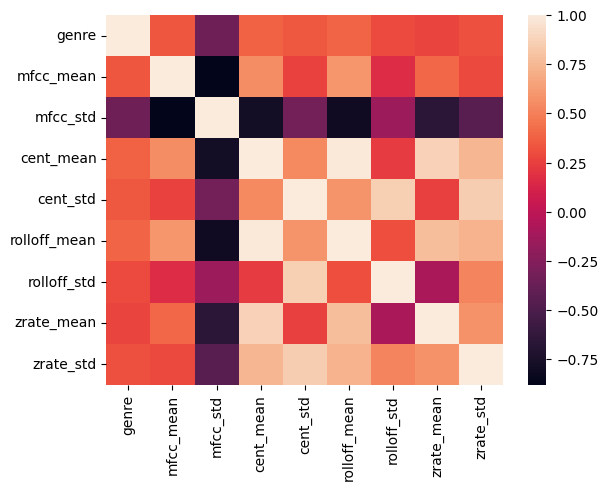

In [ ]:
# построим корреляционную матрицу
import seaborn as sns
sns.heatmap(new_df.corr())

Разделяем датасет

In [ ]:
from sklearn.model_selection import train_test_split
# X - матрица признаков (все столбцы кроме 'genre')
X = new_df.drop('genre', axis=1)

In [ ]:
X

,mfcc_mean,mfcc_std,cent_mean,cent_std,rolloff_mean,rolloff_std,zrate_mean,zrate_std
0,10.091370,25.477980,2798.065626,595.503965,6221.384345,1340.316617,0.107205,0.041829
1,11.121932,18.899975,3191.259610,421.454098,6926.771206,930.190886,0.156873,0.040043
2,10.403833,21.882269,2966.157159,439.231341,6349.419939,1086.076046,0.124161,0.035533
3,7.875815,38.226776,2174.160493,755.289326,4348.073708,1605.685773,0.102564,0.048647
4,1.754795,60.055466,2407.953177,1035.013618,5212.450719,1816.096212,0.086805,0.073622
...,...,...,...,...,...,...,...,...
995,-14.635942,114.315773,1077.268001,481.206947,2111.702776,1406.360588,0.041501,0.019602
996,-4.372128,73.393410,1854.631916,462.871667,4282.218009,1327.510192,0.063363,0.029082
997,-4.156122,74.996666,1885.619015,547.903109,4357.001341,1301.959426,0.058131,0.035234
998,-8.833426,89.054245,1873.837625,717.227997,4008.739668,1632.161657,0.077717,0.045985


In [ ]:
# Нормализуем наш целевой вектор
from sklearn import preprocessing
cols = X.columns
scaler = preprocessing.StandardScaler()
np_scaled = scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

In [ ]:
# y - целевая переменная (столбец 'genre')
y = new_df['genre']

In [ ]:
y

0      2
1      2
2      2
3      2
4      2
      ..
995    5
996    5
997    5
998    5
999    5
Name: genre, Length: 1000, dtype: int64

In [ ]:
# разделение на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# вывод размерности тренировочных и тестовых наборов
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(800, 8) (200, 8) (800,) (200,)


Классическое машинное обучение

In [ ]:
# импортируем необходимые библиотеки
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

In [ ]:
# Создадим дополнительную функцию по работе с алгоритмами обучения
def model_assess(model, title = "Default"):
	model.fit(X_train, y_train)
	preds = model.predict(X_test)
	print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

In [ ]:
# алгоритм Баейса
nb = GaussianNB()
model_assess(nb, "Naive Bayes")
# алгоритм k-ближайших соседей
knn = KNeighborsClassifier(n_neighbors=10)
model_assess(knn, "KNN")
# метод опорных векторов
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")
# логистическая регрессия
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_assess(lg, "Logistic Regression")
# случайный лес
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")
# многослойный персептрон
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
model_assess(nn, "Neural Nets")
# деревья с градиентным бустингом
xgb = XGBClassifier(n_estimators=1000)
model_assess(xgb, "XGBClassifier")

Accuracy Naive Bayes : 0.46 

Accuracy KNN : 0.54 

Accuracy Support Vector Machine : 0.56 

Accuracy Logistic Regression : 0.55 

Accuracy Random Forest : 0.53 



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Accuracy Neural Nets : 0.505 

Accuracy XGBClassifier : 0.48 

